In [ ]:
!pip install tensorflow-text==2.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score ,mean_squared_log_error
from sklearn.model_selection import train_test_split
import numpy as np
import math
import pandas as pd
from datetime import datetime , timedelta

path = ''

In [ ]:
#################
#       data load      #
#################
unique_info = 'beacon_unique_info_tb.csv'
raw_cel = 'raw_data'
target_file = 'beacon_rssi_rowdata_tb.csv'
import sys
import numpy as np


x_raws = []
time_list = []
rssi_list = []
minor_list = []

valid_minors = [1,2,3,4,5,6,7,8,9,10,12,14,16]

for minor in range(0,17):
    if minor in valid_minors:
        df = pd.read_csv(path + raw_cel + str(minor) +'.csv' , delimiter = ',')
        time_list.append( df['time'] )
        rssi_list.append( df['rssi'] )
        minor_list.append(df['minor'])
        lt = []
        print(len(rssi_list[minor]))
        print(minor)
    else:
        lt = []
        time_list.append([])
        rssi_list.append([])
        minor_list.append([])
    for index in range (0 , len(rssi_list[minor]) ):
        time_list[minor][index] 
        lt.append( [ rssi_list[minor][index] , datetime.strptime(time_list[minor][index] , '%Y-%m-%d %H:%M:%S') , minor_list[minor][index] ] )
    x_raws.append(lt)

x_raws = np.array(x_raws)


175844
1
165583
2
175695
3
172511
4
169976
5
164510
6
108222
7
167919
8
159609
9
124445
10
133138
12
148359
14
145406
16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
print(x_raws.shape)

(17,)


In [ ]:
x_raw_data = []
y_data = []

five_sec = timedelta(seconds= 5)

for minor in range(0,17):
    if minor in valid_minors:
        print(minor)
        std_time = x_raws[minor][0][1]
        for index in range(len(x_raws[minor])):
            if index == 0:
                lt = []
            if std_time+five_sec > x_raws[minor][index][1]:
                lt.append(x_raws[minor][index][0])
                if len(lt) == 5: 
                    x_raw_data.append(lt)
                    if minor == 0:
                        y_data.append([1.0])
                    else:
                        y_data.append([minor*0.5])
                    lt = []
            else:
                if len(lt)!=0:
                    x_raw_data.append(lt)
                    if minor == 0:
                        y_data.append([1.0])
                    else:
                        y_data.append([minor*0.5])
                lt = []
                lt.append(x_raws[minor][index][0])
                std_time = x_raws[minor][index][1]


x_raw_data = np.array(x_raw_data)

x_data = pad_sequences(x_raw_data,padding='post')


        

x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data)
print(y_data)

print(len(x_data))
print(len(y_data))

print(x_data.shape)
print(y_data.shape)



1
2
3
4
5
6
7
8
9
10
12
14
16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[-55 -55 -56   0   0]
 [-61 -55   0   0   0]
 [-53 -63 -55 -54   0]
 ...
 [-80 -80 -78 -79   0]
 [-80 -80   0   0   0]
 [-79 -78   0   0   0]]
[[0.5]
 [0.5]
 [0.5]
 ...
 [8. ]
 [8. ]
 [8. ]]
697487
697487
(697487, 5)
(697487, 1)


In [ ]:
# ###################################
#                  데이터 전처리                  #     
#                      사용 X                     #
# ###################################

# unique_info = 'beacon_unique_info_tb.csv'
# raw_cel = 'raw_data'
# import sys
# import numpy as np


# x_raws = []
# y_raws = []
# df = pd.DataFrame()
# rssi_list = []
# lt1 = []
# y_rawdata = []
# for k in range(0,16):
#   df = pd.read_csv(path + raw_cel + str(k) +'.csv' , delimiter = ',')
#   rssi_list.append(df['rssi'])

# sum = 0



# for minor in range(0,16):
    
#     while True:
#         if len(rssi_list[minor]) % 3 != 0:
#             remove_index = len(rssi_list[minor])
#             del(rssi_list[minor][remove_index-1])
#         else:
#             k = int(len(rssi_list[minor])/3)
        
#             # if minor == 0:
#             #     index = 1
#             # else:
#             #     index = minor - 1

#             # lt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#             # lt[index] = 1

#             if minor == 0:
#                 dist = 1.0
#             else:
#                 dist = minor*0.5
            
#             lt=[]
#             lt.append(dist)

#             for i in range(0, k):
#                 lt1.append(lt)
#             print(lt)
#             break
#     x_raws.append( np.array(rssi_list[minor]).reshape(-1,3) )  #x_raws는 3차원 배열 x_raws[minor][row][col]
    



# #print(x_raws)
# #print(y_raws)

# x = []
# y = []

# for minor in range(0,16):
#     for row in range(0,len(x_raws[minor])):
#         x.append(x_raws[minor][row])
#         #y.append(y_raws[minor][row])

# x_data =np.array(x)
# y_data =np.array(lt1)

# print(lt1[20])

# print(len(x_data))
# print(y_data.shape)
# print(x_data)



In [ ]:
def Distance_Propose_Model():
    model = Sequential()
    
    model.add(Dense(64,input_shape=(5,) ,activation='relu' ))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(layers.Dropout(0.05))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1))
    return model


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_data,y_data ,train_size=0.75 , random_state=42)

rmsle =tf.keras.losses.MeanSquaredLogarithmicError()

In [ ]:
model = Distance_Propose_Model()

model.compile(loss ='mean_squared_error'  , optimizer=Adam(learning_rate=0.0001) ,metrics=['msle'] )
history = model.fit(x_train , y_train , batch_size=50 , epochs= 800 , validation_data= (x_test , y_test) , verbose=1)

model.summary()

In [ ]:
 model.save('code/Propose_ANN_model.h5')

# # 손실 함수 그래프
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train','Validation'],loc='best')
# plt.grid()
# plt.show()

In [ ]:
models = tf.keras.models.load_model('/content/drive/MyDrive/M2TECH/2022/code/Propose_ANN_model.h5')

np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.8f}".format(x)})
res=models.evaluate(x_test,y_test,verbose=0)

y_pred = models.predict(x_test, batch_size=5)

from sklearn.metrics import mean_squared_error ,r2_score ,mean_squared_log_error
r2 = r2_score(y_test,y_pred)
print('R2 : ',r2)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", rmse)

for kk in range(0, len(y_pred)):
    if y_pred[kk] < 0 :
        y_pred[kk] = 0

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE :", rmsle)     #상대적 Error를 측정해준다.

f = open(output_path+'output_data.csv' , "w" , newline='')
writer = csv.writer(f)
for kk in range(len(y_pred)):
    writer.writerow([x_test[kk] , y_test[kk] , y_pred[kk]])


R2 :  0.692203011812355
RMSE : 1.2357746777174052
RMSLE : 0.2543772091832408


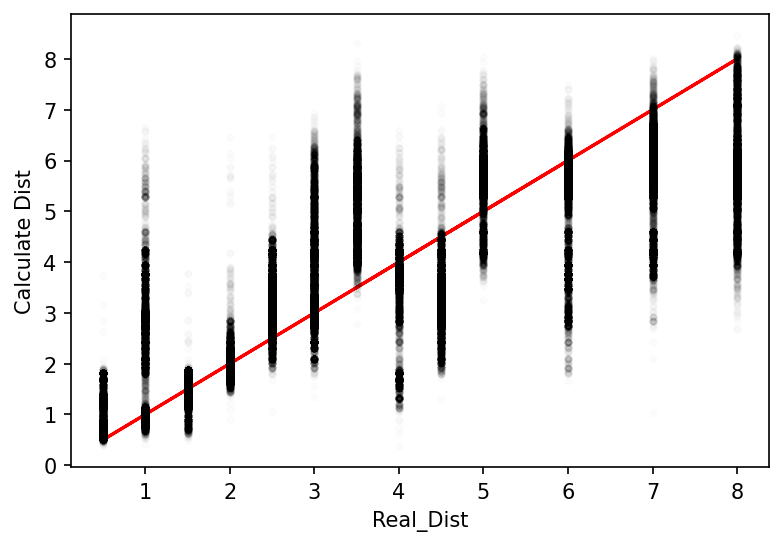

In [ ]:
plt.figure(dpi = 150)
plt.plot(y_test , y_test , 'r-')
plt.plot(y_test, y_pred , 'k.' , alpha = 0.01)
plt.xlabel("Real_Dist")
plt.ylabel("Calculate Dist")
plt.show()